In [174]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [175]:
def undistort_dohko(imagem):
    mtx = np.array([[772.07218515,0.,634.15206573],[0.,771.9959048,366.5862172],[0.,0.,1.]])
    dist = np.array([[0.09361794,-0.22823167,0.00027023,-0.00095334,0.09892737]])
    return cv2.undistort(imagem, mtx , dist)

In [176]:
captura_triangulo = "triangulo.jpg"

In [177]:
imagem = cv2.imread(captura_triangulo)
imagem = undistort_dohko(imagem)
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_gray = np.array(imagem_gray, dtype=np.float32)

In [178]:
imagem_gray

array([[184., 184., 184., ..., 176., 176., 176.],
       [183., 183., 184., ..., 176., 176., 176.],
       [184., 184., 183., ..., 175., 175., 176.],
       ...,
       [120., 121., 121., ...,  96.,  96.,  95.],
       [119., 120., 120., ...,  96.,  96.,  95.],
       [119., 120., 120., ...,  96.,  96.,  95.]], dtype=float32)

In [179]:
r_0 = cv2.cornerHarris(imagem_gray, 7, 3, 0.015)

In [180]:
r_0.max()

388229.47

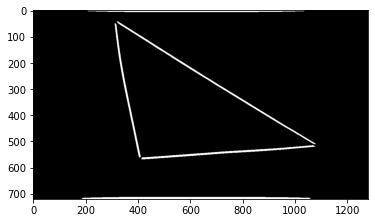

In [181]:
plt.imshow(r_0<-4000,  cmap='gray')

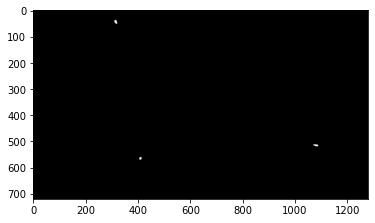

In [182]:
plt.imshow(r_0>4000, cmap='gray')

In [183]:
cantos = cv2.goodFeaturesToTrack(imagem_gray, 3, 0.01, 10)
cantos = cantos.reshape((len(cantos), 2))

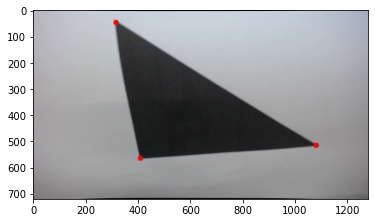

In [184]:
for n in cantos:
    cv2.circle(imagem, tuple(n.astype('int')), 10, (255,0,0), -1)
plt.imshow(imagem)

In [185]:
matcher = cv2.BFMatcher(normType=cv2.NORM_L2, crossCheck=False)
captura_triangulo_2 = "triangulo2.jpg"
imagem_2 = cv2.imread(captura_triangulo_2)
imagem_2 = undistort_dohko(imagem_2)
imagem_gray_2 = cv2.cvtColor(imagem_2, cv2.COLOR_BGR2GRAY)
imagem_gray_2 = np.array(imagem_gray_2, dtype=np.float32)
cantos_2 = cv2.goodFeaturesToTrack(imagem_gray_2, 3, 0.01, 10)
cantos_2 = cantos_2.reshape((len(cantos_2), 2))
matches = matcher.match(cantos_2, cantos)
kp1 = np.array([cv2.KeyPoint(*x, 3) for x in cantos])
kp2 = np.array([cv2.KeyPoint(*x, 3) for x in cantos_2])

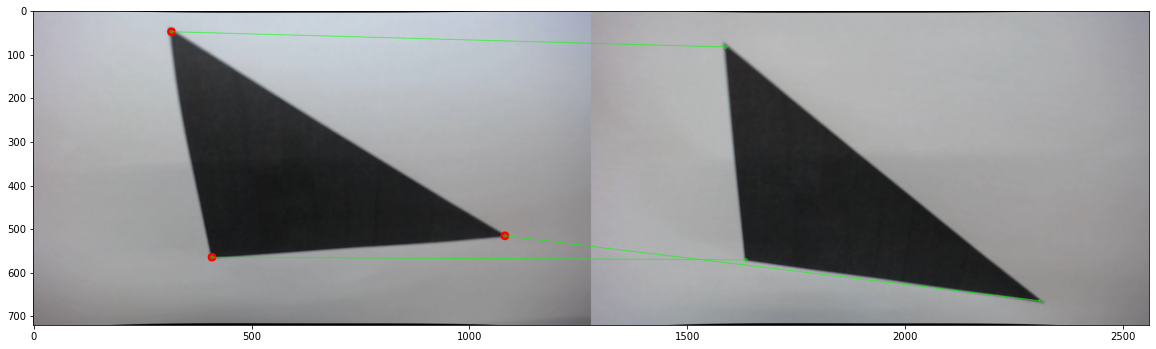

In [186]:
imagem_match = cv2.drawMatches(imagem,kp1,imagem_2,kp2,matches,None,matchColor=(0,255,0))

plt.figure(figsize = (20,20))
plt.imshow(imagem_match)

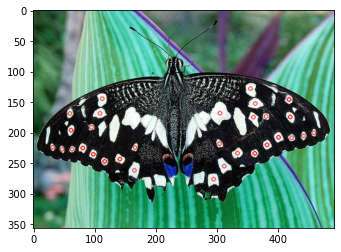

In [187]:
borboleta = cv2.imread("borboleta.jpg")

surf = cv2.xfeatures2d.SURF_create(60000)
kp1, desc1 = surf.detectAndCompute(borboleta, None)
nova_borboleta = cv2.drawKeypoints(borboleta, kp1, borboleta, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
plt.imshow(nova_borboleta)

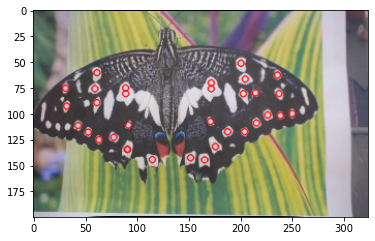

In [188]:
brabuleta = undistort_dohko(cv2.imread("brabuleta.jpg"))

brabuleta = cv2.resize(brabuleta, (324, 200))

surf.setHessianThreshold(15000)
kp2, desc2 = surf.detectAndCompute(brabuleta, None)
nova_brabuleta = cv2.drawKeypoints(brabuleta, kp2, brabuleta, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
plt.imshow(nova_brabuleta)

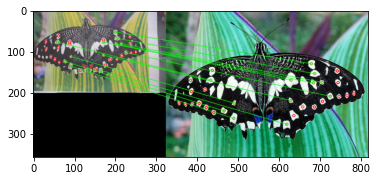

In [189]:
matches = matcher.knnMatch(desc2, desc1, k=2)
matchesMask = [[0 ,0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1 ,0]
draw_params = dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=cv2.DrawMatchesFlags_DEFAULT)
imagem = cv2.drawMatchesKnn(brabuleta, kp2, borboleta, kp1, matches, None ,**draw_params)
plt.imshow(imagem)

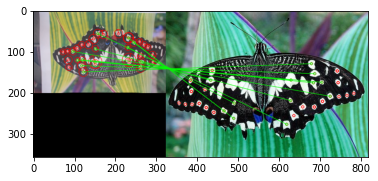

In [190]:
brabuleta = undistort_dohko(cv2.imread("brabuleta.jpg"))

brabuleta = cv2.resize(brabuleta, (324, 200))
brabuleta = cv2.rotate(brabuleta, cv2.ROTATE_180)
kp2, desc2 = surf.detectAndCompute(brabuleta, None)
nova_brabuleta = cv2.drawKeypoints(brabuleta, kp2, brabuleta, (255,0,0), flags=5)
plt.imshow(nova_brabuleta)

matches = matcher.knnMatch(desc2, desc1, k=2)
matchesMask = [[0 ,0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1 ,0]
draw_params = dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=cv2.DrawMatchesFlags_DEFAULT)
imagem = cv2.drawMatchesKnn(brabuleta, kp2, borboleta, kp1, matches, None ,**draw_params)
plt.imshow(imagem)

In [ ]:
borboleta = cv2.imread("ciduniv.png")

surf = cv2.xfeatures2d.SURF_create(10000)
kp1, desc1 = surf.detectAndCompute(borboleta, None)
nova_borboleta = cv2.drawKeypoints(borboleta, kp1, borboleta, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
plt.imshow(nova_borboleta)